# Manipulações básicas de imagem

Técnicas de manipulações básicas de imagem incluem:
- mudanças em valores de pixels individuais
- crop
- resize
- rotação de imagens


In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import Image
%matplotlib inline



Checkboard original da imagem

matriz relacionada com a imagem ==> 
 [[253 254 254 ... 253 254 253]
 [254 255 255 ... 255 255 253]
 [254 255 255 ... 254 255 253]
 ...
 [253 255 254 ... 254 255 253]
 [254 255 255 ... 255 255 254]
 [254 254 253 ... 254 254 254]]


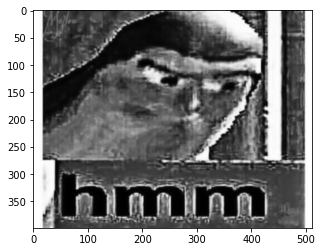

In [13]:
# lendo a imagem na escala cinza (grayscale)
meme = cv2.imread("./assets/imagem1.jpg", 0)
# setando color map para escala cinza para renderização
plt.imshow(meme, cmap='gray')
print("matriz relacionada com a imagem ==> \n", meme)

## Acessando pixels individualmente
Para acessar qualquer pixel em uma matriz numpy é preciso usar a notação matriz[l,c], onde l = linha do pixel, c = coluna do pixel. A matriz é indexada a partir de 0.

In [14]:
print("primeiro pixel ==> ", meme[0,0])
print("pixel na posição linha 20ª e 78ª coluna ==> ", meme[19, 77])

primeiro pixel ==>  253
pixel na posição linha 20ª e 78ª coluna ==>  96


## Modificando pixels
Podemos modificar a intensidade do valor do pixel.

copia modificada ===>
 [[253 254 254 ... 253 254 253]
 [254 100 100 ... 255 255 253]
 [254 255 255 ... 254 255 253]
 ...
 [253 255 254 ... 254 255 253]
 [254 255 255 ... 255 255 254]
 [254 254 253 ... 254 254 254]]


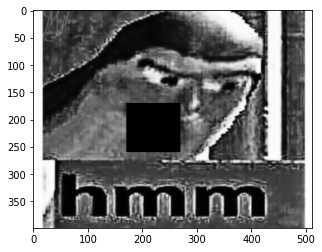

In [19]:
# modificando a intensidade do valor de pixel
meme_copy = meme.copy()
meme_copy[1, 1] = 100
meme_copy[1, 2] = 100
meme_copy[1, 3] = 100
meme_copy[1, 4] = 100
meme_copy[1, 5] = 100
meme_copy[1, 6] = 100
meme_copy[1, 7] = 100
meme_copy[1, 8] = 100

plt.imshow(meme_copy, cmap="gray")
print("copia modificada ===>\n", meme_copy)
meme_copy[170:260, 171:270] = 0
plt.imshow(meme_copy, cmap="gray")

## Cropping imagens
É uma forma simples de selecionar uma região específica da imagem.


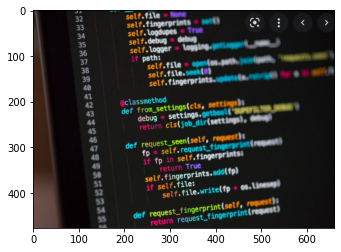

In [24]:
img2_bgr = cv2.imread("./assets/code.png", cv2.IMREAD_COLOR)
img2_rgb = img2_bgr[:,:,::- 1]
plt.imshow(img2_rgb)
